# Import library and model

In [1]:
# Import library and model
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from pmdarima import auto_arima

# Import Dataset

In [2]:
# Import Dataset
 # EUR - VND
eur = pd.read_csv('Dataset\EUR_VND.csv')
 # GBP - VND
gbp = pd.read_csv("Dataset\GBP_VND.csv")
 # JPY - VND
jpy = pd.read_csv("Dataset\JPY_VND.csv")
# Give 'Sale' column
eur = eur['Sale'].replace({',':''}, regex=True).astype(float)
gbp = gbp['Sale'].replace({',':''}, regex=True).astype(float)
jpy = jpy['Sale'].replace({',':''}, regex=True).astype(float)

# Split train, test data

In [3]:
#### EUR - VND
  # case 1. 7:3
train_eur_1 = eur[:int(0.7*len(eur))]
test_eur_1 = eur[int(0.7*len(eur)):]
  # case 2. 8:2
train_eur_2 = eur[:int(0.8*len(eur))]
test_eur_2 = eur[int(0.8*len(eur)):]
  # case 3. 9:1
train_eur_3 = eur[:int(0.9*len(eur))]
test_eur_3 = eur[int(0.9*len(eur)):]

#### GBP - VND
  # case 1. 7:3
train_gbp_1 = gbp[:int(0.7*len(gbp))]
test_gbp_1 = gbp[int(0.7*len(gbp)):]
  # case 2. 8:2
train_gbp_2 = gbp[:int(0.8*len(gbp))]
test_gbp_2 = gbp[int(0.8*len(gbp)):]
  # case 3. 9:1
train_gbp_3 = gbp[:int(0.9*len(gbp))]
test_gbp_3 = gbp[int(0.9*len(gbp)):]

#### JPY - VND
  # case 1. 7:3
train_jpy_1 = jpy[:int(0.7*len(jpy))]
test_jpy_1 = jpy[int(0.7*len(jpy)):]
  # case 2. 8:2
train_jpy_2 = jpy[:int(0.8*len(jpy))]
test_jpy_2 = jpy[int(0.8*len(jpy)):]
  # case 3. 9:1
train_jpy_3 = jpy[:int(0.9*len(jpy))]
test_jpy_3 = jpy[int(0.9*len(jpy)):]

# Function to find the optimal ARIMA model

In [4]:
# Function to find optimal ARIMA model
def select_arima_model(data):
    model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
    print(model.summary())
    return model

# Function to predict test and forcast 30, 60, 90 days

In [15]:
def forecast_days(model,pre_test):    
    # Forecast 30 days next
    model1 = model.fit(pre_test)
    forecast30 = model1.predict(n_periods = 30)
    
    # Forecast 60 days next
    model2 = model.fit(forecast30)
    forecast60 = model2.predict(n_periods = 30)
    
    # Forecast 90 days next
    model3 = model.fit(forecast60)
    forecast90 = model3.predict(n_periods = 30)
    
    return forecast30, forecast60, forecast90

In [11]:
def predict_data_ARIMA(model, test):
    # Predict test data
    pre_test = model.predict(n_periods = len(test))
    # Forecast 30, 60, 90 days next
    f3, f6, f9 = forecast_days(model, pre_test)
    
    return pre_test, f3, f6, f9

# Function to visualizate the model

In [7]:
def visualise_ARIMA_model(model, train, test, pre_test, f3, f6, f9):
    plt.figure(figsize=(12, 6))
    plt.plot(train.index,train, label='Training Data')
    plt.plot(test.index, test, label='Actual Test Data')
    plt.plot(test.index, pre_test, label='Predictions Test Data')
    plt.plot(f3.index, f3, label='Forecast 30 days next')
    plt.plot(f6.index, f6, label='Forecast 60 days next')
    plt.plot(f9.index, f9, label='Forecast 90 days next')
    plt.title('ARIMA Time Series Forecast')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate (VND)')
    plt.legend()
    plt.show()

# Function to evaluate the model

In [8]:
def evaluate_model(forecast, actual):
    forecast = np.array(forecast)
    actual = np.array(actual)
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))*100  # MAPE
    mae = np.mean(np.abs(forecast - actual))    # MAE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE

    print('RMSE =',rmse)
    print('MAPE =',mape)
    print('MAE =',mae)

# EUR - VND

- **Case 1. 7:3**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=15329.412, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15325.654, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=15327.463, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=15327.470, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15324.235, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.391 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1277
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -7661.118
Date:                Tue, 21 May 2024   AIC                          15324.235
Time:                        20:04:28   BIC                          15329.387
Sample:                             0   HQIC                         15326.170
                               - 1277                                  

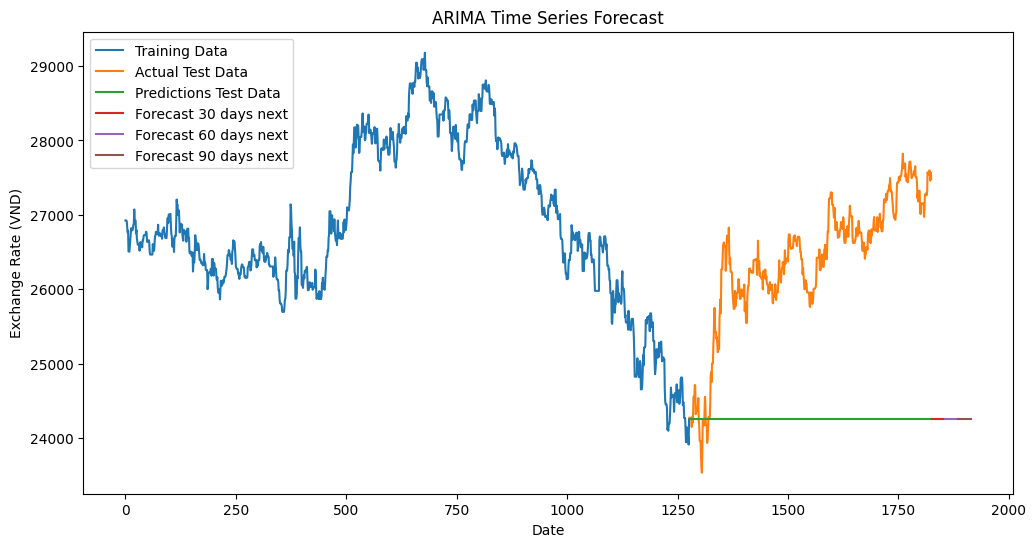

- Value on test data:
RMSE = 2289.513714185887
MAPE = 7.991867015323588
MAE = 2133.6569343065694


In [16]:
# Select model
model_eur_1 = select_arima_model(train_eur_1)
# Fit model
model_eur_1_rs = model_eur_1.fit(train_eur_1)
# Dự đoán và dự báo
predict_test_eur_1, forecast_eur1_30, forecast_eur1_60, forecast_eur1_90 = predict_data_ARIMA(model_eur_1_rs, test_eur_1)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_eur_1_rs,train_eur_1,test_eur_1,predict_test_eur_1, forecast_eur1_30, forecast_eur1_60, forecast_eur1_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_eur_1, test_eur_1)

- **Case 2. 8:2**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17729.743, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17725.853, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17727.741, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17727.744, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17723.896, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.250 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1460
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8860.948
Date:                Tue, 21 May 2024   AIC                          17723.896
Time:                        20:09:31   BIC                          17729.181
Sample:                             0   HQIC                         17725.868
                               - 1460                                  

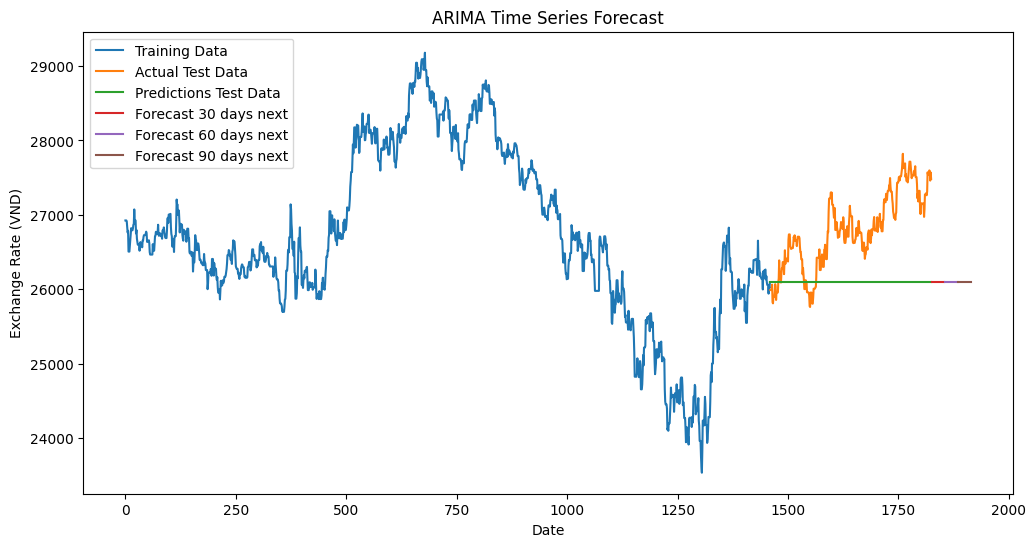

- Value on test data:
RMSE = 854.827679502621
MAPE = 2.691349171901789
MAE = 728.8657534246576


In [18]:
# Select model
model_eur_2 = select_arima_model(train_eur_2)
# Fit model
model_eur_2_rs = model_eur_2.fit(train_eur_2)
# Dự đoán và dự báo
predict_test_eur_2, forecast_eur2_30, forecast_eur2_60, forecast_eur2_90 = predict_data_ARIMA(model_eur_2_rs, test_eur_2)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_eur_2_rs,train_eur_2,test_eur_2,predict_test_eur_2,forecast_eur2_30, forecast_eur2_60, forecast_eur2_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_eur_2, test_eur_2)

- **Case 3. 9:1**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19910.875, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19906.930, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19908.872, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19908.875, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19904.931, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.238 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1642
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9951.465
Date:                Tue, 21 May 2024   AIC                          19904.931
Time:                        20:09:36   BIC                          19910.334
Sample:                             0   HQIC                         19906.935
                               - 1642                                  

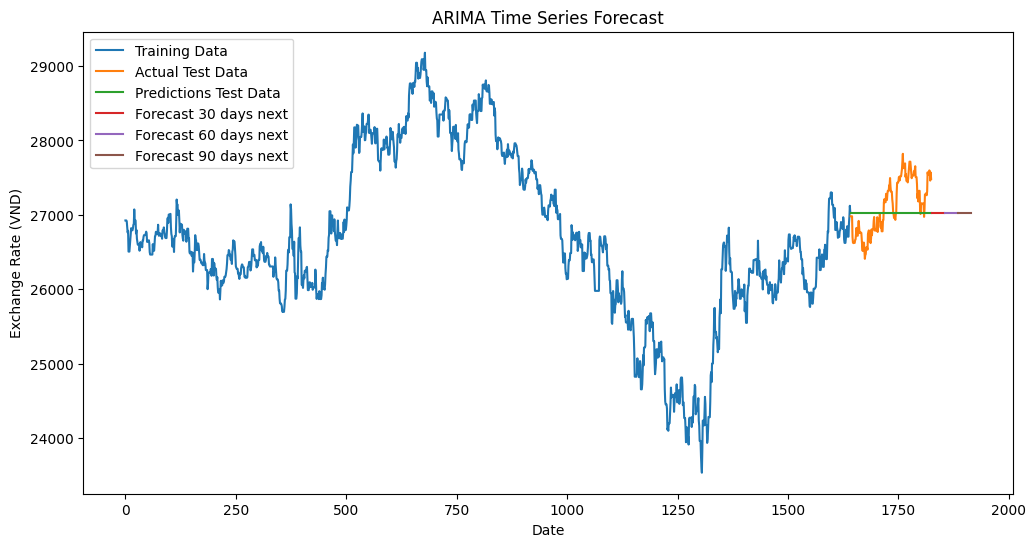

- Value on test data:
RMSE = 372.3246790996625
MAPE = 1.196754021237121
MAE = 325.5464480874317


In [19]:
# Select model
model_eur_3 = select_arima_model(train_eur_3)
# Fit model
model_eur_3_rs = model_eur_3.fit(train_eur_3)
# Dự đoán và dự báo
predict_test_eur_3, forecast_eur3_30, forecast_eur3_60, forecast_eur3_90 = predict_data_ARIMA(model_eur_3_rs,   test_eur_3)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_eur_3_rs,train_eur_3,test_eur_3,predict_test_eur_3,forecast_eur3_30, forecast_eur3_60, forecast_eur3_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_eur_3, test_eur_3)

# GBP - VND

- **Case 1. 7:3**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=16192.843, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=16189.226, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=16191.173, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=16191.181, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=16187.581, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.467 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1277
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -8092.791
Date:                Tue, 21 May 2024   AIC                          16187.581
Time:                        20:10:32   BIC                          16192.733
Sample:                             0   HQIC                         16189.516
                               - 1277                                  

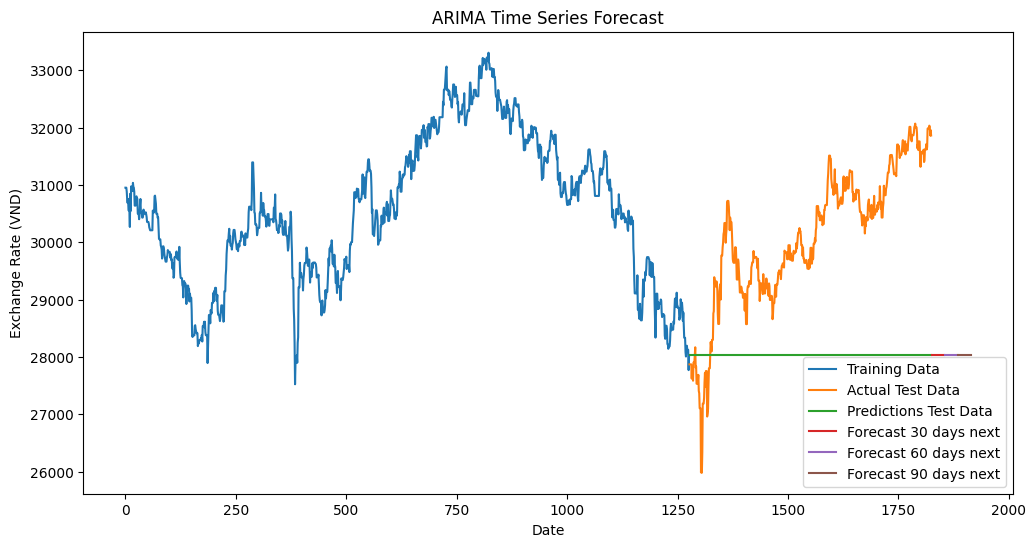

- Value on test data:
RMSE = 2391.1278749992734
MAPE = 7.061304460997023
MAE = 2160.295620437956


In [20]:
# Select model
model_gbp_1 = select_arima_model(train_gbp_1)
# Fit model
model_gbp_1_rs = model_gbp_1.fit(train_gbp_1)
# Dự đoán và dự báo
predict_test_gbp_1, forecast_gbp1_30, forecast_gbp1_60, forecast_gbp1_90 = predict_data_ARIMA(model_gbp_1_rs,   test_gbp_1)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_gbp_1_rs,train_gbp_1,test_gbp_1,predict_test_gbp_1,forecast_gbp1_30, forecast_gbp1_60, forecast_gbp1_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_gbp_1, test_gbp_1)

- **Case 2. 8:2**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=18772.879, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18770.062, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18771.696, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18771.734, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18768.179, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.344 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1460
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -9383.089
Date:                Tue, 21 May 2024   AIC                          18768.179
Time:                        20:11:17   BIC                          18773.464
Sample:                             0   HQIC                         18770.151
                               - 1460                                  

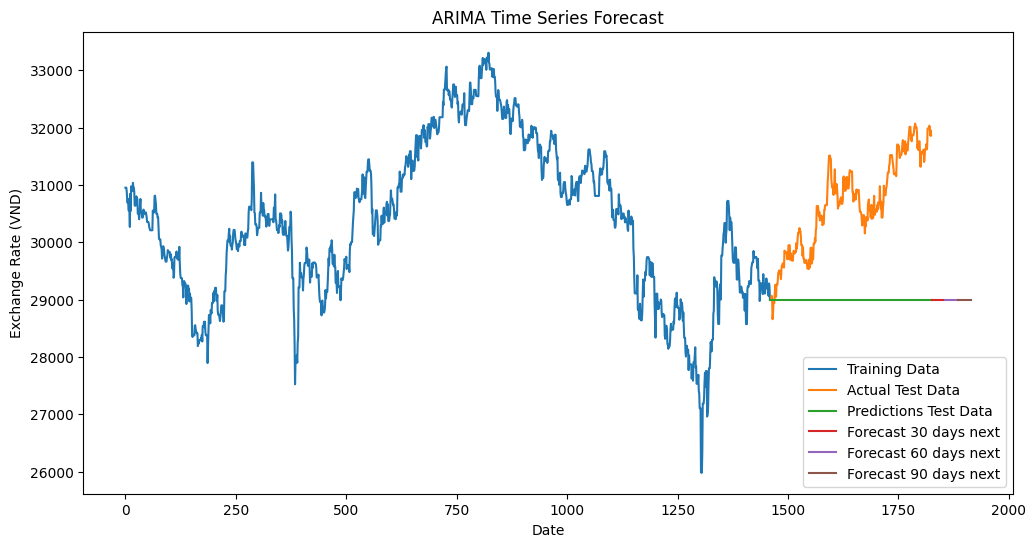

- Value on test data:
RMSE = 1865.4570081658458
MAPE = 5.445082555699798
MAE = 1689.9972602739726


In [21]:
# Select model
model_gbp_2 = select_arima_model(train_gbp_2)
# Fit model
model_gbp_2_rs = model_gbp_2.fit(train_gbp_2)
# Dự đoán và dự báo
predict_test_gbp_2, forecast_gbp2_30, forecast_gbp2_60, forecast_gbp2_90 = predict_data_ARIMA(model_gbp_2_rs,   test_gbp_2)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_gbp_2_rs,train_gbp_2,test_gbp_2,predict_test_gbp_2,forecast_gbp2_30, forecast_gbp2_60, forecast_gbp2_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_gbp_2, test_gbp_2)

- **Case 3. 9:1**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=21040.788, Time=0.21 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=21038.199, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=21039.776, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=21039.819, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=21036.201, Time=0.02 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.360 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1642
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -10517.101
Date:                Tue, 21 May 2024   AIC                          21036.201
Time:                        20:11:55   BIC                          21041.605
Sample:                             0   HQIC                         21038.205
                               - 1642                                  

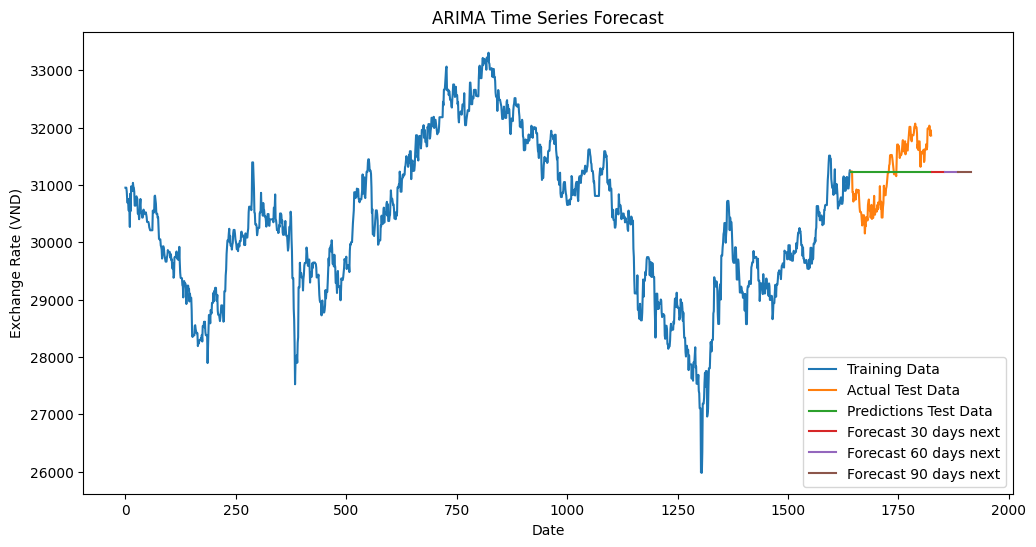

- Value on test data:
RMSE = 546.7924701973144
MAPE = 1.57506231222901
MAE = 490.11475409836066


In [22]:
# Select model
model_gbp_3 = select_arima_model(train_gbp_3)
# Fit model
model_gbp_3_rs = model_gbp_3.fit(train_gbp_3)
# Dự đoán và dự báo
predict_test_gbp_3, forecast_gbp3_30, forecast_gbp3_60, forecast_gbp3_90 = predict_data_ARIMA(model_gbp_3_rs, test_gbp_3)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_gbp_3_rs,train_gbp_3,test_gbp_3,predict_test_gbp_3,forecast_gbp3_30, forecast_gbp3_60, forecast_gbp3_90 )
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_gbp_3, test_gbp_3)

# JPY - VND

- **Case 1. 7:3**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3622.461, Time=0.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3629.273, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3627.152, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3626.859, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3628.238, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3629.592, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3629.615, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3627.615, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3627.593, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3630.422, Time=1.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3622.559, Time=0.13 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 2.874 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1

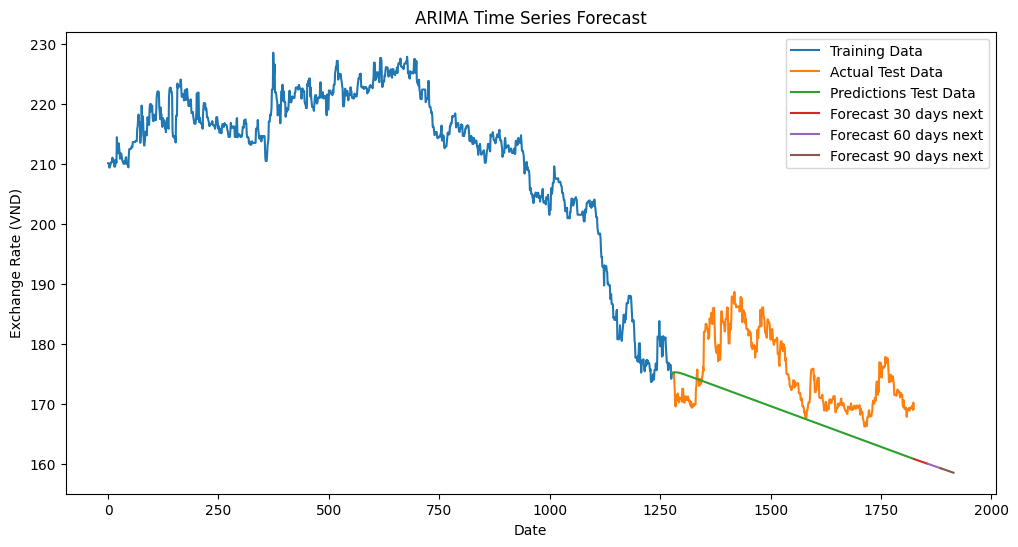

- Value on test data:
RMSE = 8.644537427495811
MAPE = 4.284272234068342
MAE = 7.600102209416892


In [17]:
# Select model
model_jpy_1 = select_arima_model(train_jpy_1)
# Fit model
model_jpy_1_rs = model_jpy_1.fit(train_jpy_1)
# Dự đoán và dự báo
predict_test_jpy_1, forecast_jpy1_30, forecast_jpy1_60, forecast_jpy1_90 = predict_data_ARIMA(model_jpy_1_rs, test_jpy_1)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_jpy_1_rs,train_jpy_1,test_jpy_1,predict_test_jpy_1,forecast_jpy1_30, forecast_jpy1_60, forecast_jpy1_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_jpy_1, test_jpy_1)

- **Case 2. 8:2**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4243.660, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4249.091, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4248.587, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4248.482, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4247.704, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4245.560, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4245.562, Time=0.79 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4249.914, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4249.970, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4247.302, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4242.836, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4247.151, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4247.251, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4244.740, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]          

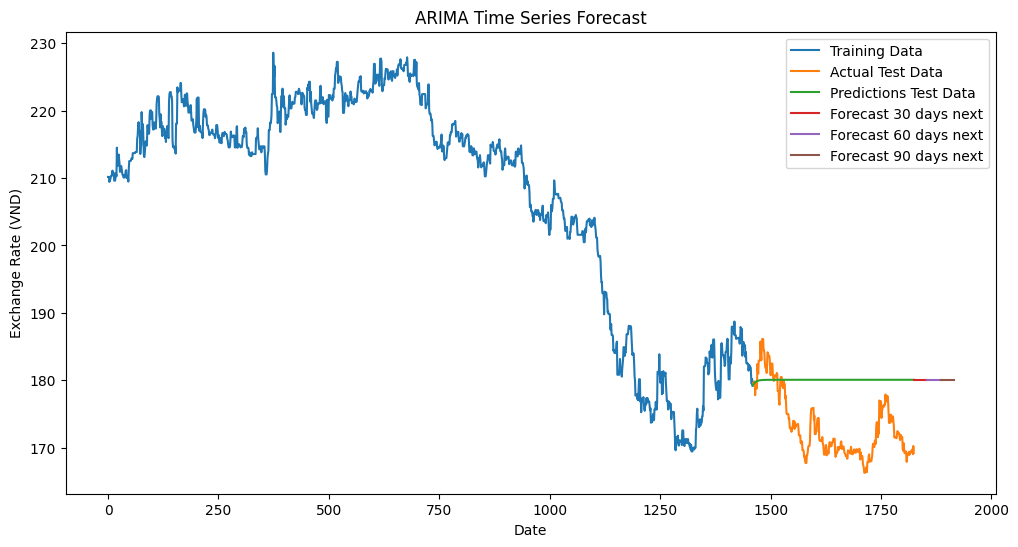

- Value on test data:
RMSE = 8.34266838438955
MAPE = 4.3683614397441675
MAE = 7.469126692879355


In [23]:
# Select model
model_jpy_2 = select_arima_model(train_jpy_2)
# Fit model
model_jpy_2_rs = model_jpy_2.fit(train_jpy_2)
# Dự đoán và dự báo
predict_test_jpy_2, forecast_jpy2_30, forecast_jpy2_60, forecast_jpy2_90 = predict_data_ARIMA(model_jpy_2_rs,  test_jpy_2)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_jpy_2_rs,train_jpy_2,test_jpy_2,predict_test_jpy_2,forecast_jpy2_30, forecast_jpy2_60, forecast_jpy2_90)
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_jpy_2, test_jpy_2)

- **Case 3. 9:1**

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4722.926, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4728.880, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4728.707, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4728.617, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4727.783, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4724.861, Time=0.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4724.862, Time=0.80 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4730.009, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4730.028, Time=0.11 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4726.647, Time=0.89 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4722.815, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4727.594, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4727.678, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=4724.756, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0]          

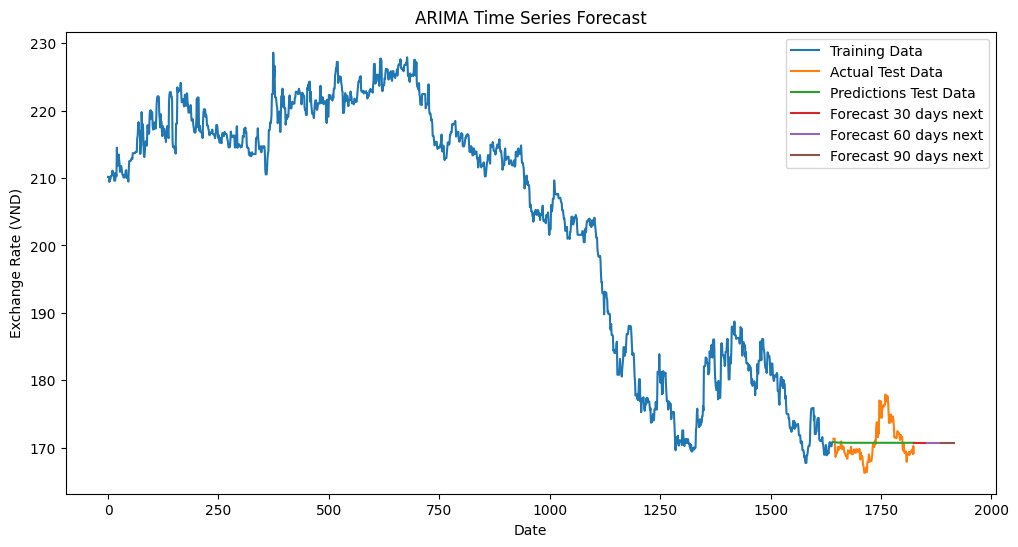

- Value on test data:
RMSE = 2.7494797000287226
MAPE = 1.263958013849169
MAE = 2.1734686225915625


In [24]:
# Select model
model_jpy_3 = select_arima_model(train_jpy_3)
# Fit model
model_jpy_3_rs = model_jpy_3.fit(train_jpy_3)
# Dự đoán và dự báo
predict_test_jpy_3, forecast_jpy3_30, forecast_jpy3_60, forecast_jpy3_90 = predict_data_ARIMA(model_jpy_3_rs,   test_jpy_3)
# Trực quan hóa kết quả
visualise_ARIMA_model(model_jpy_3_rs,train_jpy_3,test_jpy_3,predict_test_jpy_3,forecast_jpy3_30, forecast_jpy3_60, forecast_jpy3_90 )
# Đánh giá
print('- Value on test data:')
evaluate_model(predict_test_jpy_3, test_jpy_3)